离散概率分布的表示函数称为概率质量函数
连续概率分布的表示函数称为概率密度函数
概率质量函数的输出是概率，概率密度函数曲线下面积表示概率

In [196]:
#4.1

#X~N(160，x**2)
from scipy.stats import norm
from scipy.optimize import fsolve
f = lambda c: norm.cdf(200,160,c)-norm.cdf(120,160,c)-0.8
print('预估允许的最大标准差c =',fsolve(f,8)) #如果给与初值0或其它不合适的初值，则会报runtime error(说明赋予的初值不合适)，并且也返回原值，所以在返回值和赋予初值相同时，需要留意！！！！
# f(31.21)

预估允许的最大标准差c = [31.21216584]


3.1213862058843134e-05

[0.0, 1.2, 2.4, 3.6, 4.8, 6.0, 7.2, 8.4, 9.6, 10.8, 12.0, 13.2, 14.4, 15.6, 16.8, 18.0, 19.2, 20.4, 21.6, 22.8, 24.0, 25.2, 26.4, 27.6, 28.8, 30.0, 31.2, 32.4, 33.6, 34.8, 36.0, 37.2, 38.4, 39.6, 40.8, 42.0, 43.2, 44.4, 45.6, 46.8, 48.0, 49.2, 50.4, 51.6, 52.8, 54.0, 55.2, 56.4, 57.6, 58.8, 60.0, 61.2, 62.4, 63.6, 64.8, 66.0, 67.2, 68.4, 69.6, 70.8, 72.0, 73.2, 74.4, 75.6, 76.8, 78.0, 79.2, 80.4, 81.6, 82.8, 84.0, 85.2, 86.4, 87.6, 88.8, 90.0, 91.2, 92.4, 93.6, 94.8, 96.0, 97.2, 98.4, 99.6, 100.8, 102.0, 103.2, 104.4, 105.6, 106.8, 108.0, 109.2, 110.4, 111.6, 112.8, 114.0, 115.2, 116.4, 117.6, 118.79, 119.99, 121.19, 122.39, 123.59, 124.79, 125.99, 127.19, 128.39, 129.58, 130.78, 131.98, 133.18, 134.38, 135.57, 136.77, 137.97, 139.16, 140.36, 141.55, 142.75, 143.94, 145.13, 146.33, 147.52, 148.71, 149.9, 151.09, 152.27, 153.46, 154.65, 155.83, 157.01, 158.19, 159.37, 160.55, 161.73, 162.9, 164.07, 165.24, 166.4, 167.57, 168.73, 169.88, 171.04, 172.19, 173.33, 174.47, 175.61, 176.74, 17

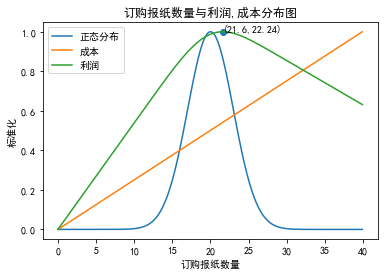

In [48]:
#4.2

'''
需求量x是随机的，衡量报童的收入，不应该是每天的收入，而是长期卖报的平均收入，即收入的数学期望
设定每天需求量为x份的概率为p（x）（x=1,2,3,4...）则需要建立p(x)与a，b，c之间的优化模型
设报童每天批发量n份报纸的平均收入为s（n），则有x<n,x=n,x>n
分类讨论：
    x<=n,则售出x份，退回n-x份
    x>n,则售出n份，无退回
最终的离散型概率约束函数为：s（n）=（0，n）sigma[(a-b)x-(b-c)(n-x)]p(x) + (n+1,oo)sigma(a-b)np(x) sigma为级数求和符号
其中，p（x）以及a,b,c已知，求使s到达max的n
可以对目标函数进行求导，确定目标函数与批发量之间的关系
文章参考：https://www.docin.com/p-89200656.html
视频参考：https://www.bilibili.com/video/BV1554y1e7Cj?spm_id_from=333.337.search-card.all.click
'''

'''
:func 报童模型演算
为便于计算，假设订购量满足x~N(20,3**2)的正态分布
一份报纸售价为2元，一份报纸进货价为0.8元，如若没有售出回收价位0.3元
'''
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def normal(x, u, v):#计算概率分布函数，也可以使用scipy中的模块
    return 1 / (v * np.sqrt(2 * np.pi)) * np.exp(-(x - u) ** 2 / 2 / v**2)

u = 20 #订购量均值
v = 3#订购量标准差
accu = 0.1
x = np.arange(u - 1 * u, u + 1 * u, accu)#x属于0到40，即取0,40之间的数字间隔为0.1
y = normal(x, u, v)#y为x所对应的概率分布函数

price = 2#售价
cost = 0.8#成本
scrap_value = 0.3 #未售出的残值为0.3

"""利润分情况考虑
先考虑某一天的情况：
    1. 进货量<=需求量则 profit = (2-0.8)*x*y
    2. 进货量>需求量则 profit = 2*x-cost*x+0.3*（进货量-需求量）
"""
def profit(papersin, marketrequire):#单次利润计算（不考虑概率的情况下）
    if papersin <= marketrequire:
        return papersin * (price - cost)#此时的利润即为(2-0.8)*x
    elif papersin > marketrequire:
        return marketrequire* price - cost * papersin + (papersin-marketrequire)*scrap_value #即此时的利润为2*x-cost*x+0.3*（进货量-需求量）

costline = x * cost # 订购x份报纸所产生的的成本

profitline = [round(sum(np.array([profit(papersin, marketrequire) for marketrequire in x])*y),2) for papersin in x]
'''
该profitline列表推导式为整个编程的关键
    外部的 for papersin in x 表示报童订购报纸的数量在不断变化从0到40不断变化
    内部的 for marketrequire in x ，表示在订购报纸数量固定的前提下（相当于嵌套循环），市场需求量在0到40之间不断变化的情况
        另外需要求平均收入，则需要乘以一个周期内概率分部函数y
'''
print(profitline)
print(max(profitline))
print(max(costline))

plt.plot(x, y / max(y), label='正态分布') #概率密度函数如果不正则话，则无法有效可视化
plt.plot(x, costline / max(costline), label='成本')
plt.plot(x, profitline / max(profitline), label='利润')
max_indx = np.argmax(profitline) #返回取得最大值时坐标的索引
print(max_indx)
print(max_indx, y[max_indx] / max(y))#输出最大坐标索引以及标准化后的数据
show_max = '({x},{y})'.format(x=round(max_indx * accu, 2), y=round(profitline[max_indx] * accu, 2))#x轴和y轴同时保留两位小数
print(show_max)#展示最大值时的横坐标以及纵坐标

plt.annotate(show_max, xy=(max_indx * accu, profitline[max_indx] / max(profitline)))#标注文字说明，这两行就是说明和画点
plt.scatter(max_indx * accu, profitline[max_indx] / max(profitline))#散点图，横轴标为最大值坐标索引*0.1,纵坐标为利润最大值时的标准化数据

plt.title('订购报纸数量与利润,成本分布图')
plt.xlabel('订购报纸数量')
plt.ylabel('标准化')

# 由于订货量为整数
c = max_indx * accu
print(c)
for i, c in enumerate((int(c), int(c)+1)):
    profit_max = sum(np.array([profit(c, marketrequire) for marketrequire in x])*y)*accu
    print(c,profit_max)
#所以应该选择22份报纸，较高利润为22.23元
plt.legend()
plt.show()

In [56]:
#4.3

#求一台家用电器收费Y的数学期望
import numpy as np
from scipy import integrate
var = lambda x: 1 / 8 * np.exp(-1 / 8 * x)
v1,err1 = integrate.quad(var,0,1)
v2,err2 = integrate.quad(var,1,2)
v3,err3 = integrate.quad(var,2,3)
v4,err4 = integrate.quad(var,3,10000)
print(v1,'\n',v2,"\n",v3,'\n',v4)
E = v1*1500+2000*v2+2500*v3+3000*v4
print('平均一台家用电器收费为：{}'.format(E))

0.1175030974154046 
 0.10369611951319053 
 0.09151150428043267 
 0.687289278790972
平均一台家用电器收费为：2674.2934822234856


In [78]:
#4.4

'''
参考csdn文章链接：https://blog.csdn.net/weixin_45807161/article/details/121459735
使用scipy.stats库中chisquare函数，需要数据量尽可能多，如果数据量过少则会出现报错
'''
import pandas as pd
from scipy import stats
from scipy.stats.stats import Power_divergenceResult
d = {'x': range(0,13), 'y':[22, 37, 20, 13, 6, 2,0,0,0,0,0,0,0]}
df = pd.DataFrame(d)
Poiss=stats.poisson(mu=1)
df['prop']=Poiss.pmf(df['x'])
df['t_days']=100*df['prop']
print(df)
df1=pd.DataFrame(df)
n=None
for i in range(len(df1)):
    if df1.iloc[i,3] < 5:
        n =i
        df1.iloc[i+1,:] = df1.iloc[i+1,:] + df1.iloc[i,:]
    else:
        break
if n is not None:
    df1 = df1.iloc[n+1:,:]
result = stats.chisquare(df1['y'], df1['t_days'], ddof=1)
print(result)#
print("pvalue < 0.05 所以不满足均值为1的泊松分布")


     x   y          prop        t_days
0    0  22  3.678794e-01  3.678794e+01
1    1  37  3.678794e-01  3.678794e+01
2    2  20  1.839397e-01  1.839397e+01
3    3  13  6.131324e-02  6.131324e+00
4    4   6  1.532831e-02  1.532831e+00
5    5   2  3.065662e-03  3.065662e-01
6    6   0  5.109437e-04  5.109437e-02
7    7   0  7.299195e-05  7.299195e-03
8    8   0  9.123994e-06  9.123994e-04
9    9   0  1.013777e-06  1.013777e-04
10  10   0  1.013777e-07  1.013777e-05
11  11   0  9.216156e-09  9.216156e-07
12  12   0  7.680130e-10  7.680130e-08
Power_divergenceResult(statistic=36.21310241772298, pvalue=0.00015596555915410734)
pvalue < 0.05 所以不满足均值为1的泊松分布


C:\Users\goodboy\AppData\Local\Temp\ipykernel_23712\145443555.py:6: DeprecationWarning: Please use `Power_divergenceResult` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import Power_divergenceResult


In [86]:
#4.5

#利用卡方检验分析4.6身高数据是否符合正态分布
import numpy as np
a = np.loadtxt(r'C:\Users\goodboy\Desktop\12660014_Python数学实验与建模程序及数据\04第4章  概率论与数理统计\Pdata4_6_2.txt')
h = a[:,::2]
junzhi =h.mean()
print(junzhi)
h_1 = np.reshape(h,(-1,1))
print(h_1)

170.25
[[172.]
 [169.]
 [169.]
 [171.]
 [167.]
 [171.]
 [168.]
 [165.]
 [169.]
 [168.]
 [166.]
 [168.]
 [164.]
 [170.]
 [165.]
 [160.]
 [175.]
 [173.]
 [172.]
 [168.]
 [155.]
 [176.]
 [172.]
 [169.]
 [176.]
 [173.]
 [168.]
 [169.]
 [167.]
 [170.]
 [166.]
 [161.]
 [173.]
 [175.]
 [158.]
 [170.]
 [169.]
 [173.]
 [164.]
 [165.]
 [167.]
 [171.]
 [166.]
 [166.]
 [172.]
 [173.]
 [178.]
 [163.]
 [169.]
 [169.]
 [178.]
 [177.]
 [170.]
 [167.]
 [169.]
 [173.]
 [170.]
 [160.]
 [179.]
 [172.]
 [163.]
 [173.]
 [165.]
 [176.]
 [162.]
 [165.]
 [172.]
 [177.]
 [182.]
 [175.]
 [170.]
 [170.]
 [169.]
 [186.]
 [174.]
 [163.]
 [172.]
 [176.]
 [166.]
 [167.]
 [172.]
 [177.]
 [177.]
 [169.]
 [166.]
 [182.]
 [176.]
 [172.]
 [173.]
 [174.]
 [171.]
 [175.]
 [165.]
 [169.]
 [168.]
 [177.]
 [184.]
 [166.]
 [171.]
 [170.]]


In [91]:
import numpy as np
from scipy.stats import chi2_contingency   # 列联表分析
from scipy.stats import chi2               # 卡方分布
def chi2_independence(alpha, data):
    CMIN, p, dof, prediction_value = chi2_contingency(data)

    if dof == 0:
        print('自由度应该大于等于1')
    elif dof == 1:
        cv = chi2.isf(alpha * 0.5, dof)
    else:
        cv = chi2.isf(alpha * 0.5, dof-1)
    if CMIN > cv:
        re = 1    # 表示拒绝原假设
    else:
         re = 0   # 表示接受原假设
    return CMIN, p, dof, re, prediction_value
# 测试


alpha1 = 0.05    # 置信度，常用0.01，0.05，用于确定拒绝域的临界值

data1 = np.array([[43, 49,22,114], [8, 2,5,15],[47,44,30,121]])

data2 = np.array([[43, 49,22], [8, 2,5],[47,44,30]]) # # 插入数据（用于测试）
a = np.loadtxt(r'C:\Users\goodboy\Desktop\12660014_Python数学实验与建模程序及数据\04第4章  概率论与数理统计\Pdata4_6_2.txt')
h = a[:,::2]
h_1 = np.reshape(h,(-1,1))

CMIN, p, freedom, re, prediction_value = chi2_independence(alpha1, h)

print("卡方值:\n",CMIN)
print("P值:\n",p)
print("自由度:\n",freedom)
print("判断变量:\n",re)
print("原数据数组同维度的理论预测值(预测结果):\n",prediction_value)#肯定原假设，身高服从正态分布

卡方值:
 12.093523375642192
P值:
 1.0
自由度:
 76
判断变量:
 0
原数据数组同维度的理论预测值(预测结果):
 [[168.70343612 171.79160059 168.55400881 170.84522761 168.10572687]
 [167.310837   170.37350954 167.16264317 169.4349486  166.71806167]
 [165.71929515 168.75283407 165.57251101 167.82320117 165.13215859]
 [168.70343612 171.79160059 168.55400881 170.84522761 168.10572687]
 [168.70343612 171.79160059 168.55400881 170.84522761 168.10572687]
 [168.50449339 171.58901615 168.35524229 170.64375918 167.90748899]
 [165.71929515 168.75283407 165.57251101 167.82320117 165.13215859]
 [167.310837   170.37350954 167.16264317 169.4349486  166.71806167]
 [167.50977974 170.57609398 167.36140969 169.63641703 166.91629956]
 [169.49920705 172.60193833 169.34907489 171.65110132 168.89867841]
 [171.28969163 174.42519824 171.13797357 173.46431718 170.68281938]
 [169.89709251 173.0071072  169.74660793 172.05403818 169.29515419]
 [166.91295154 169.96834068 166.76511013 169.03201175 166.3215859 ]
 [173.27911894 176.45104258 173.12563877 

In [59]:
#参考csdn文章链接：https://blog.csdn.net/weixin_45807161/article/details/121459735
#4.6
import numpy as np
import statsmodels.api as sm
y = np.array([1.13,1.07,4.04,4.07,4.05,4.04,4.02,4.06,4.10,4.04,
              3.86,3.85,4.08,4.11,4.08,4.01,4.02,4.04,3.97,3.95,
              4.00,4.02,4.01,4.01,4.04,3.99,4.03,3.97,3.98,3.98,
              3.88,3.88,3.91,3.95,3.92,3.97,3.92,3.90,3.97,3.90,
              4.02,3.95,4.02,3.89,3.91,4.01,3.89,3.89,3.99,4.00,
              4.02,3.86,3.96,3.97,4.00,3.82,3.98,3.99,4.02,3.93,
              4.00,4.02,4.03,4.04,4.10,3.81,3.91,3.96,4.05,4.06
              ])
x=np.hstack([np.full(10,1), np.full(10,2), np.full(10,3),
             np.full(10,4), np.full(10,5), np.full(10,6), np.full(10,7)])
d = {'x':x, 'y':y} #构造字典
model = sm.formula.ols("y~C(x)", d).fit() #构建模型
anovat = sm.stats.anova_lm(model)
print(anovat)

            df     sum_sq   mean_sq         F    PR(>F)
C(x)       6.0   2.281309  0.380218  1.689811  0.138196
Residual  63.0  14.175400  0.225006       NaN       NaN


拟合的多项式为:1.0091815032766387*x + -0.3877735575011099


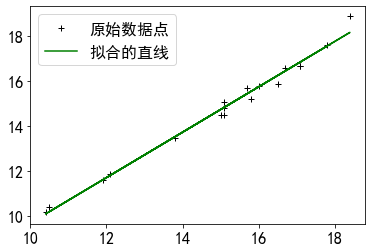

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1291.
Date:                Mon, 16 May 2022   Prob (F-statistic):           9.97e-17
Time:                        23:03:49   Log-Likelihood:                -1.2941
No. Observations:                  18   AIC:                             6.588
Df Residuals:                      16   BIC:                             8.369
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3878      0.426     -0.909      0.3

C:\Users\goodboy\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [61]:
#4.7

#参考csdn文章链接：https://blog.csdn.net/weixin_45807161/article/details/121459735
import matplotlib.pylab as plt
import numpy as np
from statsmodels.formula.api import ols
x = [17.1,10.5,13.8,15.7,11.9,10.4,15.0,16.0,17.8,
     15.8,15.1,12.1,18.4,17.1,16.7,16.5,15.1,15.1]
y = [16.7,10.4,13.5,15.7,11.6,10.2,14.5,15.8,17.6,
     15.2,14.8,11.9,18.9,16.7,16.6,15.9,15.1,14.5]
plt.plot(x, y, '+k', label = "原始数据点")
p = np.polyfit(x, y, deg=1)  #拟合一次多项式
print("拟合的多项式为:{}*x + {}".format(p[0], p[1]))
plt.rc('font', size = 16);
plt.rc('font', family = 'SimHei')
plt.plot(x, np.polyval(p,x), 'g-', label = "拟合的直线")
plt.legend() #显示多个标签
plt.show()
#显著性检测 方法一,利用ols
data = {'x':x, 'y':y}
model = ols('y~x', data).fit()
print(model.summary())
#显著性检测 方法二，手推公式
mean_x = np.mean(x)
mean_y = np.mean(y)
num1 = num2 = num3 = 0
for i in range(0, 18):
    num1 = num1 + x[i]*y[i]
    num2 = num2 + y[i]**2
    num3 = num3 + y[i]
result1 = p[0]*(num1 - 18*mean_x*mean_y)
result2 = num2 - p[1]*num3 - p[0]*num1
F = result1 / (result2 / 16)
print("假设检验结果为：",F)
if(F > 5.32):
    print("落在拒绝域，所以X与Y的线性方程是显著的")


